In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Puntos experimentales
x_list=[1.3,1.6,1.9]
y_list=[0.6200860,0.4554022,0.2818186]
dydx_list=[-0.5220232,-0.5698959,-0.5811571]

n=len(x_list) # Número de puntos experimentales

A=np.zeros((n,n))
print(A)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [50]:
# Llenando la diagonal 
def DiferenciaDividida(x_list,y_list,dydx_list):
    
    s=len(x_list) # Numero total de puntos experimentales
    
    # Creando matriz de ceros
    T=np.zeros((2*s,2*s))
    
    # Crear secuencia de Z
    z=np.zeros(2*s)
    for i in range(0,len(z)):
        z[i]=x_list[int(i/2)]
        
    # Llenando diagonal principal
    
    for i in range(0,2*s):
        for j in range(0,2*s):
            if i==j:
                T[i][j]=y_list[int(i/2)]
        
    # Llenagmos la matriz triangular superior
    for k in range(1,2*s):
        for i in range(0,2*s-1):
            for j in range(1,2*s):
                if j!=i and j==i+k and z[j]!=z[i]:
                    T[i][j]=(T[i+1][j]-T[i][j-1])/(z[j]-z[i])
                elif j!=i and j==i+k and z[j]==z[i]:
                    T[i][j]=dydx_list[int(i/2)]
    
    
    
    """
    for i in range(0,n):
        for j in range(0,n):
            if i==j:
                A[i][j]=y_list[j]
            else:
                continue

    # Llenagmos la matriz triangular superior
    for k in range(1,n):
        for i in range(0,n-1):
            for j in range(1,n):
                if j!=i and j==i+k:
                #T[i][j]=(T[i+1][j]-T[i][j-1])/(x_list[j]-x_list[i])
                    A[i][j]=(A[i+1][j]̣-A[i][j-1])/(x_list[j]-x_list[i])
    """
    return T

In [47]:
np.set_printoptions(precision=7)
print(DiferenciaDividida(x_list,y_list,dydx_list))

0 1
2 3
4 5
[[ 0.620086  -0.5220232 -0.0897427  0.0663656  0.0026667 -0.0027747]
 [ 0.         0.620086  -0.548946  -0.069833   0.0679656  0.0010019]
 [ 0.         0.         0.4554022 -0.5698959 -0.0290537  0.0685667]
 [ 0.         0.         0.         0.4554022 -0.578612  -0.0084837]
 [ 0.         0.         0.         0.         0.2818186 -0.5811571]
 [ 0.         0.         0.         0.         0.         0.2818186]]


In [59]:
# El polinomio de hermite

def PolyHermite(x_list,y_list,dydx_list,x):
    
    n=len(x_list)-1
    
    # Crear secuencia de Z
    z=np.zeros(2*(n+1))
    for i in range(0,len(z)):
        z[i]=x_list[int(i/2)]
    
    T=DiferenciaDividida(x_list,y_list,dydx_list)
    
    sum=T[0][0]
    for i in range(1,2*len(x_list)):
        prod=1
        for j in range(0,i):
            prod=prod*(x-z[j])
        sum=sum+prod*T[0][i]
                                                           

    
    return sum

In [60]:
print(PolyHermite(x_list,y_list,dydx_list,0))

1.0019440646910471


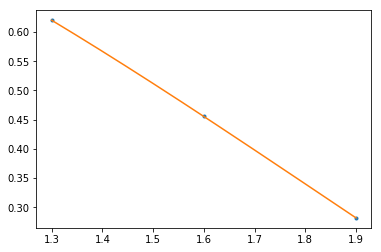

In [64]:

x_interpolado=np.linspace(min(x_list),max(x_list),1000)
y_interpolado=PolyHermite(x_list,y_list,dydx_list,x_interpolado)

fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'.')
ax.plot(x_interpolado,y_interpolado)